In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from glob import glob
from os.path import join, abspath
import sys
from scipy.stats import norm

In [2]:
root_dir = abspath(join(".."))
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Number',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [3]:
from utils import safe_mkdir

dir paths

In [4]:
root_data_dir = abspath(join(root_dir, "Data"))
twomass_dir = join(root_data_dir, "TMASS")
gaia_dir = join(root_data_dir, "Best-Pars")

completeness path

In [5]:
data_dir = join(root_data_dir, "Completeness")
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Completeness already exist. Good to go!


twomass files path

In [6]:
twomass_files = glob(join(twomass_dir, "*.hdf5"))
twomass_files.sort()
twomass_files[:5]

['/home2/s20321005/Thesis-Project/Data/TMASS/tmass-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-004-005.hdf5']

add JK as color

In [7]:
tmass = vaex.open_many(twomass_files)
tmass["JK"] = tmass["Jmag"] - tmass["Kmag"]
tmass = tmass.extract()
tmass

#,designation,use_src,rd_flg,ra,dec,Jmag,Kmag,ph_qual,JK
0,00000036-0848119,1,222,0.001505,-8.803321,13.041,12.539,AAA,0.5020008
1,00000135-0828045,1,222,0.005649,-8.467934,13.285,12.946,AAA,0.33899975
2,00000182-0806237,1,222,0.007621,-8.106606,12.34,12.006,AAA,0.3340006
3,00000409-0854339,1,222,0.017071,-8.909436,13.434,12.841,AAA,0.5930004
4,00000432-0837071,1,222,0.018027,-8.618639,11.935,11.584,AAA,0.3510008
...,...,...,...,...,...,...,...,...,...
"50,250,394",23594291-7708495,1,222,359.928833,-77.14711,10.942,10.558,AAA,0.38400078
"50,250,395",23594324-7738278,1,212,359.93019,-77.64106,9.331,8.665,AAA,0.66600037
"50,250,396",23594896-7715221,1,222,359.954028,-77.256149,13.336,12.843,AAA,0.49300003
"50,250,397",23594907-7751479,1,222,359.954495,-77.863312,13.261,12.619,AAA,0.64199924


Let's see the heatmap count of twomass

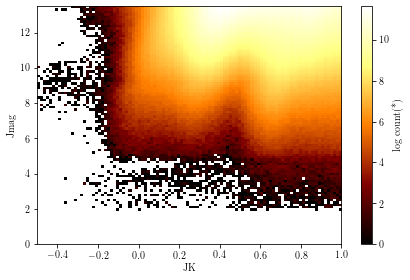

In [8]:
tmass.viz.heatmap("JK", "Jmag", shape=100, show=True, limits=[[-0.5, 1], [0, 13.5]], f='log')

filter out only for A quality

## Check at each color range

/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/vaex/viz/mpl.py:146: RuntimeWarning: divide by zero encountered in log
  fgrid = f(grid)


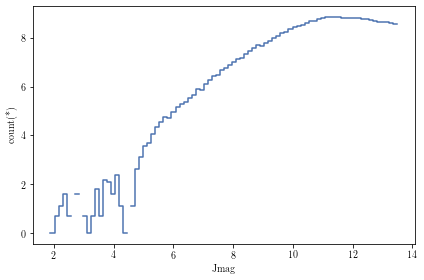

In [9]:
tmass_filt = tmass.filter("JK <0.1").filter("JK > 0")
tmass_filt = tmass_filt.extract()
tmass_filt.viz.histogram("Jmag", shape=100, show=True, limits=[0, 13.5], f='log')

looks nice to me!

# gaia

In [10]:
gaia_files = glob(join(gaia_dir, "gaia-*.hdf5"))
gaia_files.sort()
gaia_files[:5]

['/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-004-005.hdf5']

load gaia

In [11]:
gaia = vaex.open_many(gaia_files)
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym
0,0.180498,-89.243835,13.123000144958496,12.678999900817871,AAA,4611967772579686144,18.71722984313965,17.611683049974353,0.017649758607149124,-6.337454890038764,0.018100611865520477,1.553482146463873,0.01645069755613804,14.506683349609375,14.941158294677734,13.901935577392578,927.3828125,1271.326416015625,0.9241908192634583,1.2207494974136353,303.11950730746855,-27.865822360149586,586.5784301757812,580.6773071289062,592.7108764648438,0.44209998846054077,0.4359000027179718,0.4494999945163727,nan,nan,nan,G,00004331-8914378,1,222,--,152.84475708007812,gaia,4.919384002685547,4.919384002685547,1.0,5675.6103515625,gspphot,11.37353515625,13.83251953125,0.0,4.49429988861084,gspphot,0.006199836730957031,0.004800319671630859,0.0,nan,--,nan,nan,nan,-0.5550000071525574,gspphot,0.016799986362457275,0.01639997959136963,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan
1,0.338177,-89.481033,8.97700023651123,8.038000106811523,AAA,4611761957746621312,9.622093200683594,7.609580877064016,0.014360921457409859,-5.888883602727228,0.014550801366567612,0.8273958945757836,0.012673814781010151,11.280521392822266,12.197066307067871,10.340993881225586,1234.30517578125,3648.09716796875,1.0564011335372925,1.3118351697921753,303.05891462343493,-27.634759739425405,1171.7508544921875,1142.204345703125,1543.05419921875,0.8133999705314636,0.6207000017166138,0.8633999824523926,-0.12999999523162842,-0.2199999988079071,-0.029999999329447746,K,00012116-8928517,1,111,--,30.259687423706055,gaia,0.167822003364563,0.167822003364563,1.0,4251.74755859375,gspphot,142.98876953125,39.806640625,0.0,2.018699884414673,gspphot,0.2597998380661011,0.024700164794921875,0.0,nan,--,nan,nan,nan,0.11720000207424164,gspphot,0.006000004708766937,0.002799995243549347,0.0,-0.05000000074505806,gspspec,0.0,0.010000001639127731,0.0,nan,--,nan,nan,nan
2,0.392894,-89.286575,12.769000053405762,12.329999923706055,AAA,4611779756091083008,6.918576717376709,4.89813965086399,0.01557445153594017,-4.88619823091078,0.016693463549017906,1.4919122615226004,0.015075388364493847,14.183528900146484,14.626376152038574,13.570565223693848,865.9398193359375,1384.228271484375,1.063724160194397,1.2225970029830933,303.10597686099044,-27.824720661451884,625.9152221679688,620.0595703125,631.713623046875,0.5141000151634216,0.5109000205993652,0.5171999931335449,nan,nan,nan,G,00013429-8917116,1,222,--,8.28650951385498,gaia,6.514820575714111,6.514820575714111,1.0,5750.4326171875,gspphot,5.1650390625,4.8857421875,0.0,4.354100227355957,gspphot,0.006400108337402344,0.006499767303466797,0.0,nan,--,nan,nan,nan,-0.2969000041484833,gspphot,0.007499992847442627,0.006400018930435181,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan
3,0.491097,-89.325348,13.28499984741211,12.92199993133545,AAA,4611778656579457664,3.3354551792144775,2.758184654146036,0.015947440639138222,1.8755476312609647,0.01630321703851223,0.9132976622425212,0.014618651941418648,14.359504699707031,14.703383445739746,13.843310356140137,1021.37451171875,1692.3876953125,0.975788950920105,1.2055027484893799,303.09523730720935,-27.787137577515743,1043.23193359375,1028.8033447265625,1058.512939453125,0.3813000023365021,0.37709999084472656,0.3856000006198883,nan,nan,nan,F,00015786-8919312,1,222,--,-9.221250534057617,gaia,6.796242713928223,6.796242713928223,1.0,6268.86279296875,gspphot,7.986328125,8.31982421875,0.0,4.254300117492676,gspphot,0.0125999

let's see the sky distribution using healpix.

Gaia data have special column called `source_id` which can be transformed into healpix index. Let's see the distribution of the data.

In [12]:
import healpy as hp

level = 6
factor = 34359738368 * (4**(12-level))
nmax = hp.nside2npix(2**level)
epsilon = 1e-16
counts = gaia.count(binby=gaia.source_id/factor, limits=[-epsilon, nmax-epsilon], shape=nmax)
counts

array([129, 153, 150, ..., 388, 393, 388])

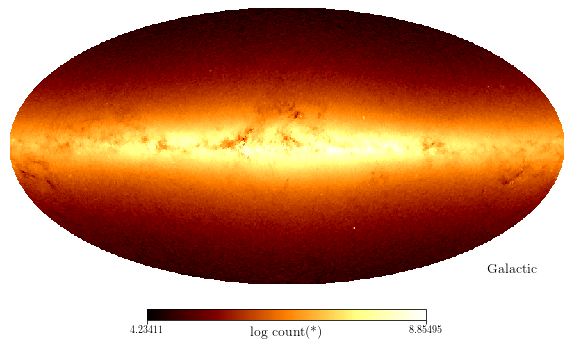

In [13]:
gaia.viz.healpix_heatmap(
    f="log",
    healpix_level=6,
    figsize=(10,8),
    healpix_output="galactic"
)

add color JK

In [14]:
gaia['JK'] = gaia['Jmag'] - gaia['Kmag']
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK
0,0.180498,-89.243835,13.123000144958496,12.678999900817871,AAA,4611967772579686144,18.71722984313965,17.611683049974353,0.017649758607149124,-6.337454890038764,0.018100611865520477,1.553482146463873,0.01645069755613804,14.506683349609375,14.941158294677734,13.901935577392578,927.3828125,1271.326416015625,0.9241908192634583,1.2207494974136353,303.11950730746855,-27.865822360149586,586.5784301757812,580.6773071289062,592.7108764648438,0.44209998846054077,0.4359000027179718,0.4494999945163727,nan,nan,nan,G,00004331-8914378,1,222,--,152.84475708007812,gaia,4.919384002685547,4.919384002685547,1.0,5675.6103515625,gspphot,11.37353515625,13.83251953125,0.0,4.49429988861084,gspphot,0.006199836730957031,0.004800319671630859,0.0,nan,--,nan,nan,nan,-0.5550000071525574,gspphot,0.016799986362457275,0.01639997959136963,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.444000244140625
1,0.338177,-89.481033,8.97700023651123,8.038000106811523,AAA,4611761957746621312,9.622093200683594,7.609580877064016,0.014360921457409859,-5.888883602727228,0.014550801366567612,0.8273958945757836,0.012673814781010151,11.280521392822266,12.197066307067871,10.340993881225586,1234.30517578125,3648.09716796875,1.0564011335372925,1.3118351697921753,303.05891462343493,-27.634759739425405,1171.7508544921875,1142.204345703125,1543.05419921875,0.8133999705314636,0.6207000017166138,0.8633999824523926,-0.12999999523162842,-0.2199999988079071,-0.029999999329447746,K,00012116-8928517,1,111,--,30.259687423706055,gaia,0.167822003364563,0.167822003364563,1.0,4251.74755859375,gspphot,142.98876953125,39.806640625,0.0,2.018699884414673,gspphot,0.2597998380661011,0.024700164794921875,0.0,nan,--,nan,nan,nan,0.11720000207424164,gspphot,0.006000004708766937,0.002799995243549347,0.0,-0.05000000074505806,gspspec,0.0,0.010000001639127731,0.0,nan,--,nan,nan,nan,0.939000129699707
2,0.392894,-89.286575,12.769000053405762,12.329999923706055,AAA,4611779756091083008,6.918576717376709,4.89813965086399,0.01557445153594017,-4.88619823091078,0.016693463549017906,1.4919122615226004,0.015075388364493847,14.183528900146484,14.626376152038574,13.570565223693848,865.9398193359375,1384.228271484375,1.063724160194397,1.2225970029830933,303.10597686099044,-27.824720661451884,625.9152221679688,620.0595703125,631.713623046875,0.5141000151634216,0.5109000205993652,0.5171999931335449,nan,nan,nan,G,00013429-8917116,1,222,--,8.28650951385498,gaia,6.514820575714111,6.514820575714111,1.0,5750.4326171875,gspphot,5.1650390625,4.8857421875,0.0,4.354100227355957,gspphot,0.006400108337402344,0.006499767303466797,0.0,nan,--,nan,nan,nan,-0.2969000041484833,gspphot,0.007499992847442627,0.006400018930435181,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.43900012969970703
3,0.491097,-89.325348,13.28499984741211,12.92199993133545,AAA,4611778656579457664,3.3354551792144775,2.758184654146036,0.015947440639138222,1.8755476312609647,0.01630321703851223,0.9132976622425212,0.014618651941418648,14.359504699707031,14.703383445739746,13.843310356140137,1021.37451171875,1692.3876953125,0.975788950920105,1.2055027484893799,303.09523730720935,-27.787137577515743,1043.23193359375,1028.8033447265625,1058.512939453125,0.3813000023365021,0.37709999084472656,0.3856000006198883,nan,nan,nan,F,00015786-8919312,1,222,--,-9.221250534057617,gaia,6.796242713928223,6.796242713928223,1.0,6268.86279296875,gspphot,7.9863

and the heatmap

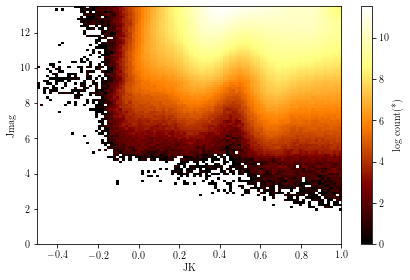

In [15]:
gaia.viz.heatmap("JK", "Jmag", shape=100, show=True, limits=[[-0.5, 1], [0, 13.5]], f='log')

looks similar to 2MASS.

Let's compare them!

/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/vaex/viz/mpl.py:146: RuntimeWarning: divide by zero encountered in log
  fgrid = f(grid)


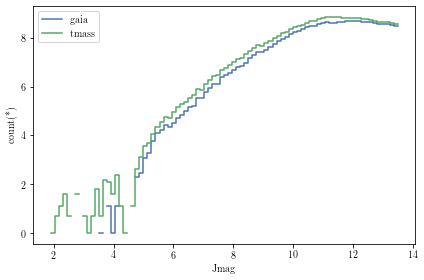

In [16]:
gaia_filt = gaia.filter("JK <0.1").filter("JK > 0")
gaia_filt = gaia_filt.extract()
gaia_filt.viz.histogram("Jmag", shape=100, label="gaia", limits=[0, 13.5], f='log')
tmass_filt.viz.histogram("Jmag", shape=100, label="tmass", limits=[0, 13.5], f='log')
plt.legend()

# Let's do some math

We are going to fit them for each color range.

In [17]:
from utils import load_spectral_types

In [18]:
spectral_types = load_spectral_types()
spectral_types

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [19]:
jk_bound = np.load(join(root_data_dir, "boundaries.npy"))
jk_bound

array([[-0.019     ,  0.12400287],
       [ 0.12400287,  0.18800095],
       [ 0.18800095,  0.21900118],
       [ 0.21900118,  0.24100237],
       [ 0.24100237,  0.25900047],
       [ 0.25900047,  0.27500098],
       [ 0.27500098,  0.28800311],
       [ 0.28800311,  0.30000054],
       [ 0.30000054,  0.3120019 ],
       [ 0.3120019 ,  0.32300249],
       [ 0.32300249,  0.33300231],
       [ 0.33300231,  0.34300214],
       [ 0.34300214,  0.35300196],
       [ 0.35300196,  0.36200101],
       [ 0.36200101,  0.376     ]])

In [20]:
data_dir

'/home2/s20321005/Thesis-Project/Data/Completeness'

<ipython-input-21-0d28ba10c50b>:18: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(tmass_H), width=dj, label="tmass", alpha=0.4, edgecolor='k')
<ipython-input-21-0d28ba10c50b>:19: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(gaia_H), width=dj, label="gaia", alpha=0.4, edgecolor='k')


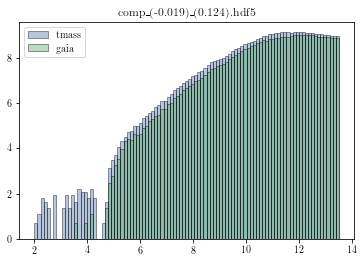

<ipython-input-21-0d28ba10c50b>:24: RuntimeWarning: invalid value encountered in divide
  comp = gaia_H/tmass_H


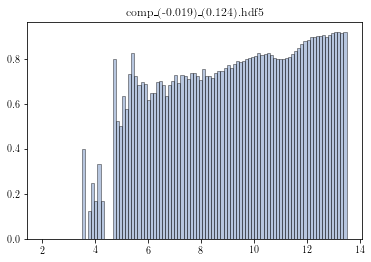

comp_(-0.019)_(0.124).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

<ipython-input-21-0d28ba10c50b>:18: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(tmass_H), width=dj, label="tmass", alpha=0.4, edgecolor='k')
<ipython-input-21-0d28ba10c50b>:19: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(gaia_H), width=dj, label="gaia", alpha=0.4, edgecolor='k')


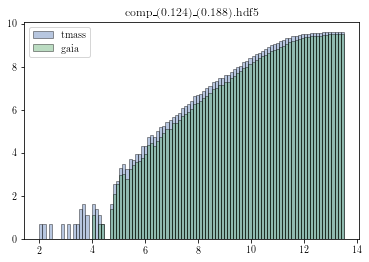

<ipython-input-21-0d28ba10c50b>:24: RuntimeWarning: invalid value encountered in divide
  comp = gaia_H/tmass_H


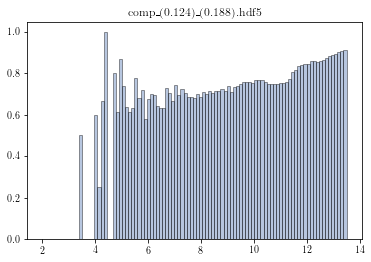

comp_(0.124)_(0.188).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

<ipython-input-21-0d28ba10c50b>:18: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(tmass_H), width=dj, label="tmass", alpha=0.4, edgecolor='k')
<ipython-input-21-0d28ba10c50b>:19: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(gaia_H), width=dj, label="gaia", alpha=0.4, edgecolor='k')


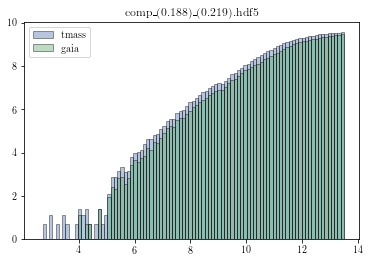

<ipython-input-21-0d28ba10c50b>:24: RuntimeWarning: invalid value encountered in divide
  comp = gaia_H/tmass_H


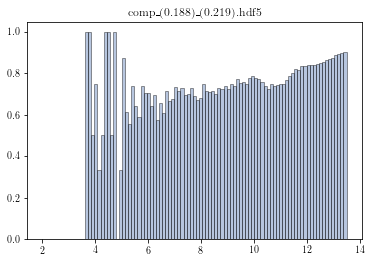

comp_(0.188)_(0.219).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

<ipython-input-21-0d28ba10c50b>:18: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(tmass_H), width=dj, label="tmass", alpha=0.4, edgecolor='k')
<ipython-input-21-0d28ba10c50b>:19: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(gaia_H), width=dj, label="gaia", alpha=0.4, edgecolor='k')


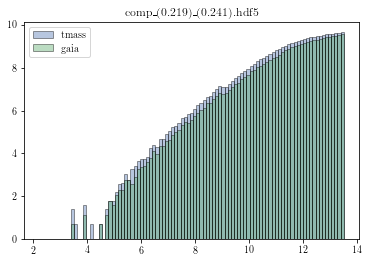

<ipython-input-21-0d28ba10c50b>:24: RuntimeWarning: invalid value encountered in divide
  comp = gaia_H/tmass_H


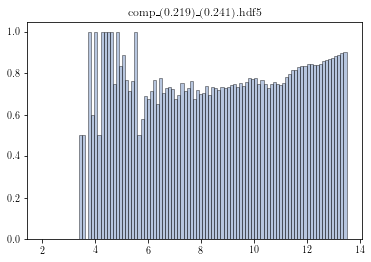

comp_(0.219)_(0.241).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

<ipython-input-21-0d28ba10c50b>:18: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(tmass_H), width=dj, label="tmass", alpha=0.4, edgecolor='k')
<ipython-input-21-0d28ba10c50b>:19: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(gaia_H), width=dj, label="gaia", alpha=0.4, edgecolor='k')


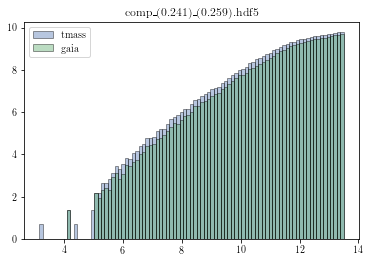

<ipython-input-21-0d28ba10c50b>:24: RuntimeWarning: invalid value encountered in divide
  comp = gaia_H/tmass_H


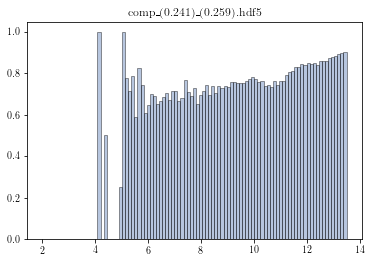

comp_(0.241)_(0.259).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

<ipython-input-21-0d28ba10c50b>:18: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(tmass_H), width=dj, label="tmass", alpha=0.4, edgecolor='k')
<ipython-input-21-0d28ba10c50b>:19: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(gaia_H), width=dj, label="gaia", alpha=0.4, edgecolor='k')


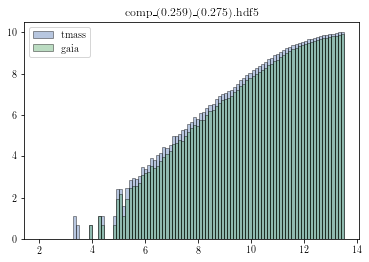

<ipython-input-21-0d28ba10c50b>:24: RuntimeWarning: invalid value encountered in divide
  comp = gaia_H/tmass_H


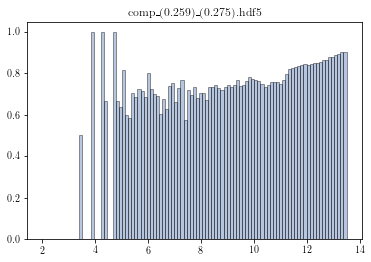

comp_(0.259)_(0.275).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

<ipython-input-21-0d28ba10c50b>:18: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(tmass_H), width=dj, label="tmass", alpha=0.4, edgecolor='k')
<ipython-input-21-0d28ba10c50b>:19: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(gaia_H), width=dj, label="gaia", alpha=0.4, edgecolor='k')


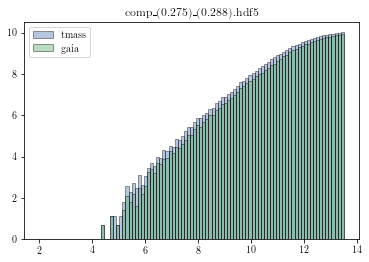

<ipython-input-21-0d28ba10c50b>:24: RuntimeWarning: invalid value encountered in divide
  comp = gaia_H/tmass_H


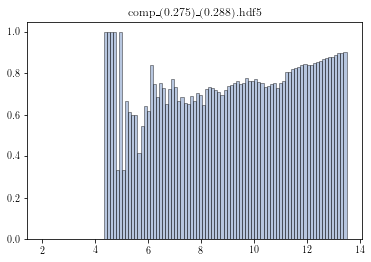

comp_(0.275)_(0.288).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

<ipython-input-21-0d28ba10c50b>:18: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(tmass_H), width=dj, label="tmass", alpha=0.4, edgecolor='k')
<ipython-input-21-0d28ba10c50b>:19: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(gaia_H), width=dj, label="gaia", alpha=0.4, edgecolor='k')


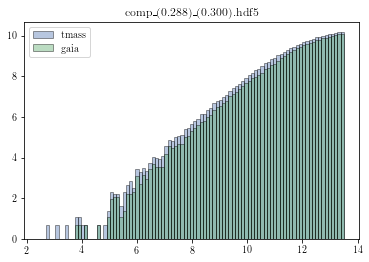

<ipython-input-21-0d28ba10c50b>:24: RuntimeWarning: invalid value encountered in divide
  comp = gaia_H/tmass_H


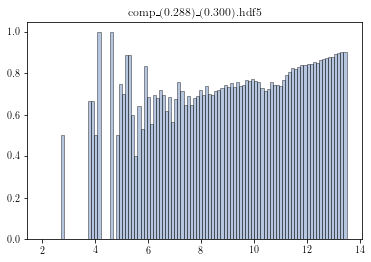

comp_(0.288)_(0.300).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

<ipython-input-21-0d28ba10c50b>:18: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(tmass_H), width=dj, label="tmass", alpha=0.4, edgecolor='k')
<ipython-input-21-0d28ba10c50b>:19: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(gaia_H), width=dj, label="gaia", alpha=0.4, edgecolor='k')


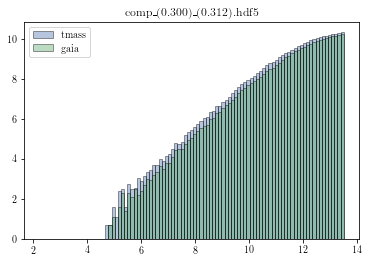

<ipython-input-21-0d28ba10c50b>:24: RuntimeWarning: invalid value encountered in divide
  comp = gaia_H/tmass_H


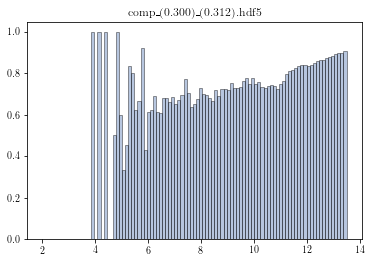

comp_(0.300)_(0.312).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

<ipython-input-21-0d28ba10c50b>:18: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(tmass_H), width=dj, label="tmass", alpha=0.4, edgecolor='k')
<ipython-input-21-0d28ba10c50b>:19: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(gaia_H), width=dj, label="gaia", alpha=0.4, edgecolor='k')


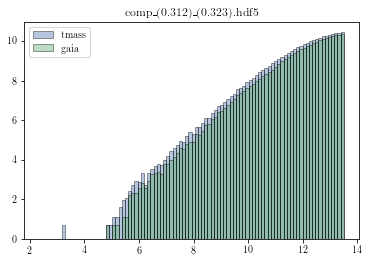

<ipython-input-21-0d28ba10c50b>:24: RuntimeWarning: invalid value encountered in divide
  comp = gaia_H/tmass_H


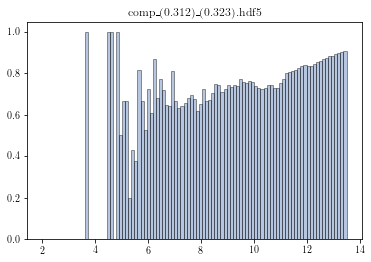

comp_(0.312)_(0.323).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

<ipython-input-21-0d28ba10c50b>:18: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(tmass_H), width=dj, label="tmass", alpha=0.4, edgecolor='k')
<ipython-input-21-0d28ba10c50b>:19: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(gaia_H), width=dj, label="gaia", alpha=0.4, edgecolor='k')


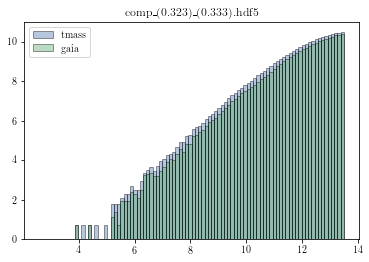

<ipython-input-21-0d28ba10c50b>:24: RuntimeWarning: invalid value encountered in divide
  comp = gaia_H/tmass_H


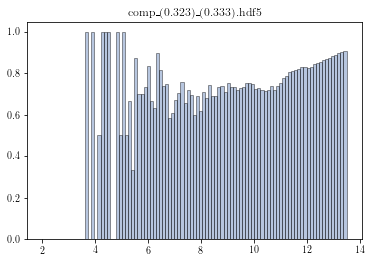

comp_(0.323)_(0.333).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

<ipython-input-21-0d28ba10c50b>:18: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(tmass_H), width=dj, label="tmass", alpha=0.4, edgecolor='k')
<ipython-input-21-0d28ba10c50b>:19: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(gaia_H), width=dj, label="gaia", alpha=0.4, edgecolor='k')


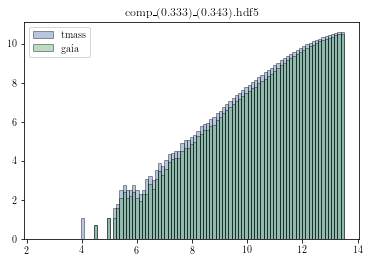

<ipython-input-21-0d28ba10c50b>:24: RuntimeWarning: invalid value encountered in divide
  comp = gaia_H/tmass_H


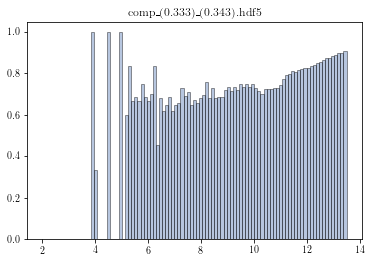

comp_(0.333)_(0.343).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

<ipython-input-21-0d28ba10c50b>:18: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(tmass_H), width=dj, label="tmass", alpha=0.4, edgecolor='k')
<ipython-input-21-0d28ba10c50b>:19: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(gaia_H), width=dj, label="gaia", alpha=0.4, edgecolor='k')


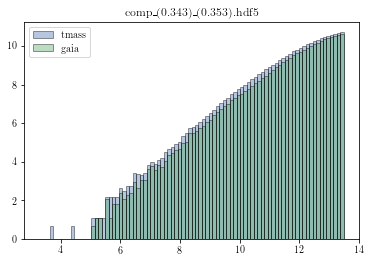

<ipython-input-21-0d28ba10c50b>:24: RuntimeWarning: invalid value encountered in divide
  comp = gaia_H/tmass_H


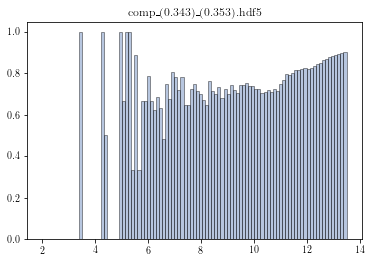

comp_(0.343)_(0.353).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

<ipython-input-21-0d28ba10c50b>:18: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(tmass_H), width=dj, label="tmass", alpha=0.4, edgecolor='k')
<ipython-input-21-0d28ba10c50b>:19: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(gaia_H), width=dj, label="gaia", alpha=0.4, edgecolor='k')


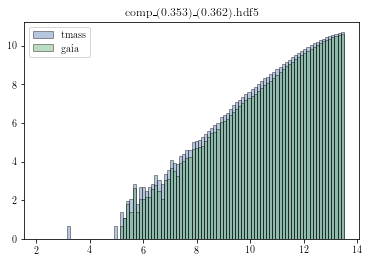

<ipython-input-21-0d28ba10c50b>:24: RuntimeWarning: invalid value encountered in divide
  comp = gaia_H/tmass_H


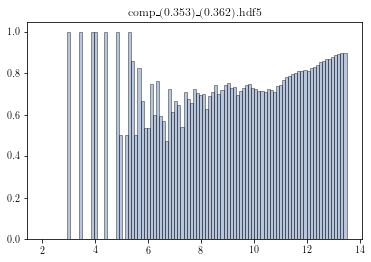

comp_(0.353)_(0.362).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

<ipython-input-21-0d28ba10c50b>:18: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(tmass_H), width=dj, label="tmass", alpha=0.4, edgecolor='k')
<ipython-input-21-0d28ba10c50b>:19: RuntimeWarning: divide by zero encountered in log
  plt.bar(js, np.log(gaia_H), width=dj, label="gaia", alpha=0.4, edgecolor='k')


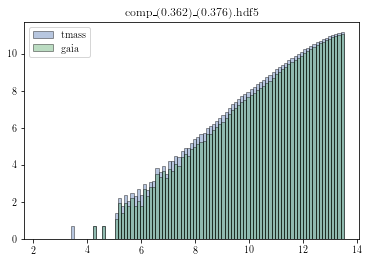

<ipython-input-21-0d28ba10c50b>:24: RuntimeWarning: invalid value encountered in divide
  comp = gaia_H/tmass_H


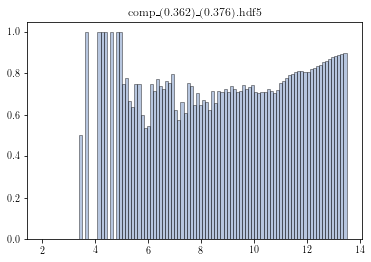

comp_(0.362)_(0.376).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

In [21]:
from tqdm import tqdm
from scipy import interpolate

j_edge = np.linspace(2, 13.5, 100)
js = (j_edge[1:] + j_edge[:-1])/2
dj = j_edge[1] - j_edge[0]
for jk_low, jk_high in jk_bound:
    name = f"comp_({jk_low:.03f})_({jk_high:.03f}).hdf5"
    tmass_filt = tmass.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
    tmass_filt = tmass_filt.extract()
    tmass_J = tmass_filt.Jmag.to_numpy()
    tmass_H, _ = np.histogram(tmass_J, bins=j_edge)
    gaia_filt = gaia.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
    gaia_filt = gaia_filt.extract()
    gaia_J = gaia_filt.Jmag.to_numpy()
    gaia_H, _ = np.histogram(gaia_J, bins=j_edge)
    
    plt.bar(js, np.log(tmass_H), width=dj, label="tmass", alpha=0.4, edgecolor='k')
    plt.bar(js, np.log(gaia_H), width=dj, label="gaia", alpha=0.4, edgecolor='k')
    plt.legend()
    plt.title(name)
    plt.show()
    mask = (gaia_H == 0) | (tmass_H == 0)
    comp = gaia_H/tmass_H
    comp[comp > 1] = 1
    comp[mask] = 0
    plt.bar(js, comp, width=dj, alpha=0.4, edgecolor='k')
    plt.title(name)
    plt.show()
    print(name)
    df = vaex.from_arrays(j=js, comp=comp)
    df.export(join(data_dir, name), progress=True)